# 06-post-analysis

How can we verify if the trained models are correct in their predictions? 

One way is to verify against known candidates. 

In [19]:
import sys
sys.path.insert(0, "../")

import pandas as pd
from pathlib import Path
from src.visualization import visualize

data_dir = Path.cwd().parent.parent.parent / "data"
models_dir = Path.cwd().parent.parent.parent / "models" 

print("Current data directory {}".format(data_dir))

# Optional: Load the "autoreload" extension so that code can change
%load_ext autoreload

#OPTIONAL: Always reload modules so that as you change code in src, it gets loaded
%autoreload 2

Current data directory /Users/oliverhebnes/Documents/predicting-solid-state-qubit-material-hosts/data
The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [20]:
known_candidates = ["SiC","SiGe", "C", "Si",
                         "GaN", "GaAs", "AlN", "ZnS", "ZnSe", "ZnO",
                         "AlP", "GaP", "AlAs", "ZnTe", "CdS"
                    ]
QD_2D_candidates = ["BN", "MoS2", "WSe2", "WS2",#2D
                    "InAs" #QD
                   ] 

In [21]:
title = "Ferrenti summary"
InsertApproach = "01-ferrenti-approach"
numberOfPrincipalComponents = 10

## Training set

In [22]:
trainingSet   = pd.read_pickle(data_dir / InsertApproach / "processed" / "trainingData.pkl")
trainingTarget   = pd.read_pickle(data_dir / InsertApproach / "processed" / "trainingTarget.pkl")
trainingSet["candidate"] = trainingTarget

In [23]:
trainingSet

,material_id,full_formula,AtomicOrbitals|HOMO_character,AtomicOrbitals|HOMO_element,AtomicOrbitals|HOMO_energy,AtomicOrbitals|LUMO_character,AtomicOrbitals|LUMO_element,AtomicOrbitals|LUMO_energy,AtomicPackingEfficiency|dist from 1 clusters |APE| < 0.010,AtomicPackingEfficiency|dist from 3 clusters |APE| < 0.010,...,AFLOWML|ml_agl_thermal_conductivity_300K,AFLOWML|ml_agl_thermal_expansion_300K,MP|spacegroup.number,MP|total_magnetization,MP|nelements,MP|efermi,MP|Eg,AFLOWML|Eg,MP|Polar SG,candidate
0,mp-7,S6,2.0,16,-0.261676,2.0,16,-0.261676,1.000000,1.000000,...,3.440,0.000070,148,0.000034,1,0.348895,2.4881,2.490,0,1.0
1,mp-14,Se3,2.0,34,-0.245806,2.0,34,-0.245806,1.000000,1.000000,...,3.010,0.000062,152,0.000000,1,1.879425,1.0119,0.997,0,1.0
2,mp-19,Te3,2.0,52,-0.226594,2.0,52,-0.226594,1.000000,1.000000,...,3.166,0.000054,152,0.000000,1,5.455518,0.5752,0.000,0,1.0
3,mp-47,C4,2.0,6,-0.199186,2.0,6,-0.199186,1.000000,1.000000,...,3.223,0.000086,194,0.000000,1,9.983070,3.3395,3.166,0,1.0
4,mp-66,C2,2.0,6,-0.199186,2.0,6,-0.199186,1.000000,1.000000,...,4.279,0.000086,227,0.000000,1,9.614764,4.3387,3.593,0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1520,mp-1275839,Co4Bi24S8O64,3.0,27,-0.322368,3.0,27,-0.322368,0.034641,0.052087,...,2.690,0.000052,3,0.000351,4,3.917413,2.3186,2.156,1,0.0
1521,mp-1291058,Sr4Mn2Mo2O12,3.0,25,-0.266540,3.0,25,-0.266540,0.052116,0.058661,...,2.749,0.000060,1,0.992766,4,3.987258,0.8079,0.000,1,0.0
1522,mp-1291630,Fe12O16,3.0,26,-0.295049,3.0,26,-0.295049,0.091832,0.135247,...,2.841,0.000060,5,6.504784,2,4.184540,0.1221,0.000,1,0.0
1523,mp-1298346,Sr8Co4O16,3.0,27,-0.322368,3.0,27,-0.322368,0.057864,0.095274,...,2.725,0.000061,4,0.000485,3,2.323107,0.5907,0.000,1,0.0


In [24]:
#trainingSet[["full_formula", "pretty_formula", "candidate"]][trainingSet["pretty_formula"].isin(known_candidates)]

## Test set
How many entries in our test set consists of known candidates?

In [25]:
Summary = pd.read_pickle(models_dir / InsertApproach /  "summary" / Path("PCA-" + str(numberOfPrincipalComponents) + "-" + "summary.pkl"))
Summary = Summary.reset_index(drop=True)
Summary.shape

(23676, 11)

In [26]:
Summary[Summary["pretty_formula"].isin(known_candidates)]

,material_id,full_formula,pretty_formula,LOG,LOG Prob,DT,DT Prob,RF,RF Prob,GB,GB Prob
1,mp-24,C8,C,1.0,0.990186,1.0,1.000000,1.0,0.824203,1.0,0.993722
42,mp-370,Cd1S1,CdS,1.0,0.955030,1.0,1.000000,1.0,0.978821,1.0,0.997438
44,mp-380,Zn2Se2,ZnSe,1.0,0.954350,1.0,0.857143,1.0,0.923717,1.0,0.992588
82,mp-661,Al2N2,AlN,1.0,0.949958,1.0,0.857143,1.0,0.738220,1.0,0.879573
83,mp-672,Cd2S2,CdS,1.0,0.942122,1.0,0.857143,1.0,0.884682,1.0,0.994750
...,...,...,...,...,...,...,...,...,...,...,...
22989,mp-1202959,Zn18S18,ZnS,1.0,0.947523,1.0,0.857143,1.0,0.812241,1.0,0.939323
23181,mp-1203645,C48,C,1.0,0.603560,0.0,0.000000,1.0,0.812893,1.0,0.990096
23281,mp-1204046,Si106,Si,1.0,0.976426,1.0,1.000000,1.0,0.951316,1.0,0.993830
23351,mp-1204356,Si19C19,SiC,1.0,0.964502,1.0,1.000000,1.0,0.944567,1.0,0.995789


In [27]:
Summary[Summary["pretty_formula"].isin(QD_2D_candidates)]

,material_id,full_formula,pretty_formula,LOG,LOG Prob,DT,DT Prob,RF,RF Prob,GB,GB Prob
37,mp-344,B4N4,BN,1.0,0.824600,1.0,0.540541,1.0,0.779426,1.0,0.982717
123,mp-984,B2N2,BN,1.0,0.950460,1.0,0.948905,1.0,0.922303,1.0,0.997124
180,mp-1434,Mo1S2,MoS2,1.0,0.725086,1.0,1.000000,1.0,0.735111,1.0,0.931015
202,mp-1599,B4N4,BN,1.0,0.550636,1.0,0.540541,1.0,0.571433,0.0,0.261655
203,mp-1639,B1N1,BN,1.0,0.989322,1.0,0.948905,1.0,0.795778,1.0,0.988740
327,mp-2653,B2N2,BN,1.0,0.974902,1.0,0.836735,1.0,0.790243,1.0,0.983196
1761,mp-7991,B2N2,BN,1.0,0.951423,1.0,0.948905,1.0,0.915850,1.0,0.996926
2322,mp-9813,W1S2,WS2,1.0,0.799091,1.0,0.982456,1.0,0.739103,1.0,0.930624
2830,mp-13151,B4N4,BN,1.0,0.938939,1.0,0.540541,1.0,0.767543,1.0,0.739863
4786,mp-20305,In1As1,InAs,1.0,0.974267,1.0,1.000000,1.0,0.943098,1.0,0.998803


## How many entries does the models agree on? 

In [28]:
RF_DT_GB_LOG = Summary[(Summary["RF "] == 1) & 
                       (Summary["DT "] == 1) & 
                       (Summary["GB "] == 1) & 
                       (Summary["LOG "] == 1)]

RF_DT_GB_LOG.to_csv(models_dir / InsertApproach / "summary" / "RF_DT_GB_LOG.csv")
RF_DT_GB_LOG

,material_id,full_formula,pretty_formula,LOG,LOG Prob,DT,DT Prob,RF,RF Prob,GB,GB Prob
0,mvc-12905,Fe4O8,FeO2,1.0,0.663300,1.0,0.836735,1.0,0.645094,1.0,0.567091
1,mp-24,C8,C,1.0,0.990186,1.0,1.000000,1.0,0.824203,1.0,0.993722
2,mp-25,N8,N2,1.0,0.932765,1.0,0.948905,1.0,0.742569,1.0,0.993018
3,mp-111,Ne1,Ne,1.0,0.979292,1.0,1.000000,1.0,0.951110,1.0,0.999397
4,mp-118,P24,P,1.0,0.951776,1.0,1.000000,1.0,0.915251,1.0,0.997717
...,...,...,...,...,...,...,...,...,...,...,...
23668,mp-1289745,Ba4Fe2Mo2O12,Ba2FeMoO6,1.0,0.910298,1.0,1.000000,1.0,0.962434,1.0,0.996706
23669,mp-1296711,La2Co2O6,LaCoO3,1.0,0.825559,1.0,0.764706,1.0,0.866672,1.0,0.976669
23670,mp-1299874,Li4La16Co4O32,LiLa4CoO8,1.0,0.762677,1.0,0.677419,1.0,0.703544,1.0,0.868208
23672,mp-1541522,Bi2P2O8,BiPO4,1.0,0.792612,1.0,0.836735,1.0,0.799442,1.0,0.987486


In [29]:
Summary[(Summary["RF Prob"] > 0.8) & 
        (Summary["DT Prob"] > 0.8) & 
        (Summary["GB Prob"] > 0.8) & 
        (Summary["LOG Prob"] > 0.8)]

,material_id,full_formula,pretty_formula,LOG,LOG Prob,DT,DT Prob,RF,RF Prob,GB,GB Prob
1,mp-24,C8,C,1.0,0.990186,1.0,1.000000,1.0,0.824203,1.0,0.993722
3,mp-111,Ne1,Ne,1.0,0.979292,1.0,1.000000,1.0,0.951110,1.0,0.999397
4,mp-118,P24,P,1.0,0.951776,1.0,1.000000,1.0,0.915251,1.0,0.997717
5,mp-137,Ge12,Ge,1.0,0.985244,1.0,1.000000,1.0,0.937636,1.0,0.999020
7,mp-157,P4,P,1.0,0.974831,1.0,1.000000,1.0,0.956218,1.0,0.999165
...,...,...,...,...,...,...,...,...,...,...,...
23581,mp-1205311,Sr8Ni4Te4O24,Sr2NiTeO6,1.0,0.939268,1.0,1.000000,1.0,0.929105,1.0,0.997252
23600,mp-1205362,Nb4Ag4O12,NbAgO3,1.0,0.879199,1.0,1.000000,1.0,0.889187,1.0,0.959313
23612,mp-1205391,Ta4Sb4O16,TaSbO4,1.0,0.836116,1.0,0.987179,1.0,0.851594,1.0,0.977748
23638,mp-1209329,Pr4V4O12,PrVO3,1.0,0.803910,1.0,1.000000,1.0,0.803881,1.0,0.844152


In [30]:
RF_DT_GB = Summary[(Summary["RF "] == 1) & 
                       (Summary["DT "] == 1) & 
                       (Summary["GB "] == 1)]

RF_DT_GB.to_csv(models_dir / InsertApproach / "summary" / "RF_DT_GB.csv")
RF_DT_GB

,material_id,full_formula,pretty_formula,LOG,LOG Prob,DT,DT Prob,RF,RF Prob,GB,GB Prob
0,mvc-12905,Fe4O8,FeO2,1.0,0.663300,1.0,0.836735,1.0,0.645094,1.0,0.567091
1,mp-24,C8,C,1.0,0.990186,1.0,1.000000,1.0,0.824203,1.0,0.993722
2,mp-25,N8,N2,1.0,0.932765,1.0,0.948905,1.0,0.742569,1.0,0.993018
3,mp-111,Ne1,Ne,1.0,0.979292,1.0,1.000000,1.0,0.951110,1.0,0.999397
4,mp-118,P24,P,1.0,0.951776,1.0,1.000000,1.0,0.915251,1.0,0.997717
...,...,...,...,...,...,...,...,...,...,...,...
23668,mp-1289745,Ba4Fe2Mo2O12,Ba2FeMoO6,1.0,0.910298,1.0,1.000000,1.0,0.962434,1.0,0.996706
23669,mp-1296711,La2Co2O6,LaCoO3,1.0,0.825559,1.0,0.764706,1.0,0.866672,1.0,0.976669
23670,mp-1299874,Li4La16Co4O32,LiLa4CoO8,1.0,0.762677,1.0,0.677419,1.0,0.703544,1.0,0.868208
23672,mp-1541522,Bi2P2O8,BiPO4,1.0,0.792612,1.0,0.836735,1.0,0.799442,1.0,0.987486


In [31]:
Summary[(Summary["RF Prob"] > 0.75) & 
        (Summary["DT Prob"] > 0.75) & 
        (Summary["GB Prob"] > 0.75)]

,material_id,full_formula,pretty_formula,LOG,LOG Prob,DT,DT Prob,RF,RF Prob,GB,GB Prob
1,mp-24,C8,C,1.0,0.990186,1.0,1.000000,1.0,0.824203,1.0,0.993722
3,mp-111,Ne1,Ne,1.0,0.979292,1.0,1.000000,1.0,0.951110,1.0,0.999397
4,mp-118,P24,P,1.0,0.951776,1.0,1.000000,1.0,0.915251,1.0,0.997717
5,mp-137,Ge12,Ge,1.0,0.985244,1.0,1.000000,1.0,0.937636,1.0,0.999020
7,mp-157,P4,P,1.0,0.974831,1.0,1.000000,1.0,0.956218,1.0,0.999165
...,...,...,...,...,...,...,...,...,...,...,...
23666,mp-1288517,La4Fe4As4O4,LaFeAsO,1.0,0.807274,1.0,1.000000,1.0,0.750619,1.0,0.937181
23667,mp-1288734,Y4Co4O12,YCoO3,1.0,0.771737,1.0,1.000000,1.0,0.755216,1.0,0.989325
23668,mp-1289745,Ba4Fe2Mo2O12,Ba2FeMoO6,1.0,0.910298,1.0,1.000000,1.0,0.962434,1.0,0.996706
23669,mp-1296711,La2Co2O6,LaCoO3,1.0,0.825559,1.0,0.764706,1.0,0.866672,1.0,0.976669


In [32]:
Summary[(Summary["RF "] == 1) &  
        (Summary["GB "] == 1)]

,material_id,full_formula,pretty_formula,LOG,LOG Prob,DT,DT Prob,RF,RF Prob,GB,GB Prob
0,mvc-12905,Fe4O8,FeO2,1.0,0.663300,1.0,0.836735,1.0,0.645094,1.0,0.567091
1,mp-24,C8,C,1.0,0.990186,1.0,1.000000,1.0,0.824203,1.0,0.993722
2,mp-25,N8,N2,1.0,0.932765,1.0,0.948905,1.0,0.742569,1.0,0.993018
3,mp-111,Ne1,Ne,1.0,0.979292,1.0,1.000000,1.0,0.951110,1.0,0.999397
4,mp-118,P24,P,1.0,0.951776,1.0,1.000000,1.0,0.915251,1.0,0.997717
...,...,...,...,...,...,...,...,...,...,...,...
23669,mp-1296711,La2Co2O6,LaCoO3,1.0,0.825559,1.0,0.764706,1.0,0.866672,1.0,0.976669
23670,mp-1299874,Li4La16Co4O32,LiLa4CoO8,1.0,0.762677,1.0,0.677419,1.0,0.703544,1.0,0.868208
23672,mp-1541522,Bi2P2O8,BiPO4,1.0,0.792612,1.0,0.836735,1.0,0.799442,1.0,0.987486
23673,mp-1541714,Cs3As2Cl9,Cs3As2Cl9,1.0,0.761181,1.0,1.000000,1.0,0.747954,1.0,0.966041


In [33]:
Summary[Summary["LOG "]==1]

,material_id,full_formula,pretty_formula,LOG,LOG Prob,DT,DT Prob,RF,RF Prob,GB,GB Prob
0,mvc-12905,Fe4O8,FeO2,1.0,0.663300,1.0,0.836735,1.0,0.645094,1.0,0.567091
1,mp-24,C8,C,1.0,0.990186,1.0,1.000000,1.0,0.824203,1.0,0.993722
2,mp-25,N8,N2,1.0,0.932765,1.0,0.948905,1.0,0.742569,1.0,0.993018
3,mp-111,Ne1,Ne,1.0,0.979292,1.0,1.000000,1.0,0.951110,1.0,0.999397
4,mp-118,P24,P,1.0,0.951776,1.0,1.000000,1.0,0.915251,1.0,0.997717
...,...,...,...,...,...,...,...,...,...,...,...
23670,mp-1299874,Li4La16Co4O32,LiLa4CoO8,1.0,0.762677,1.0,0.677419,1.0,0.703544,1.0,0.868208
23671,mp-1304797,Sr12In4Ni4O24,Sr3InNiO6,1.0,0.622362,0.0,0.290909,0.0,0.436017,0.0,0.258375
23672,mp-1541522,Bi2P2O8,BiPO4,1.0,0.792612,1.0,0.836735,1.0,0.799442,1.0,0.987486
23673,mp-1541714,Cs3As2Cl9,Cs3As2Cl9,1.0,0.761181,1.0,1.000000,1.0,0.747954,1.0,0.966041


In [34]:
generatedData = pd.read_pickle(data_dir / "interim" / "featurized" / "featurized-11-04-2021.pkl")
generatedData = generatedData[~generatedData["material_id"].isin(trainingSet["material_id"])].reset_index(drop=True)

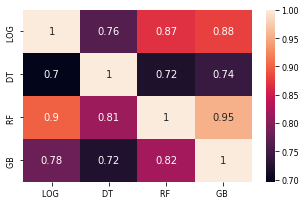

[1.0, 0.6962134928756987, 0.6430694201021108, 0.5730397012878153, 0.7220063886730553, 0.7190429017755087, 0.819553455764688, 1.0, 1.0, 0.7804455640399905, 0.8692372170997485]


,LOG LOG LOG LOG,LOG LOG LOG DT,LOG LOG RF DT,LOG RF GB DT,DT GB DT DT,DT RF DT DT,RF RF GB GB,RF RF RF RF,GB GB GB GB,GB LOG LOG LOG,RF LOG LOG LOG
LOG LOG LOG LOG,1.0,0.696213,0.643069,0.57304,0.722006,0.719043,0.819553,1.0,1.0,0.780446,0.869237
LOG LOG LOG DT,1.0,0.696213,0.643069,0.57304,0.722006,0.719043,0.819553,1.0,1.0,0.780446,0.869237
LOG LOG RF DT,1.0,0.696213,0.643069,0.57304,0.722006,0.719043,0.819553,1.0,1.0,0.780446,0.869237
LOG RF GB DT,1.0,0.696213,0.643069,0.57304,0.722006,0.719043,0.819553,1.0,1.0,0.780446,0.869237
DT GB DT DT,1.0,0.696213,0.643069,0.57304,0.722006,0.719043,0.819553,1.0,1.0,0.780446,0.869237
DT RF DT DT,1.0,0.696213,0.643069,0.57304,0.722006,0.719043,0.819553,1.0,1.0,0.780446,0.869237
RF RF GB GB,1.0,0.696213,0.643069,0.57304,0.722006,0.719043,0.819553,1.0,1.0,0.780446,0.869237
RF RF RF RF,1.0,0.696213,0.643069,0.57304,0.722006,0.719043,0.819553,1.0,1.0,0.780446,0.869237
GB GB GB GB,1.0,0.696213,0.643069,0.57304,0.722006,0.719043,0.819553,1.0,1.0,0.780446,0.869237
GB LOG LOG LOG,1.0,0.696213,0.643069,0.57304,0.722006,0.719043,0.819553,1.0,1.0,0.780446,0.869237


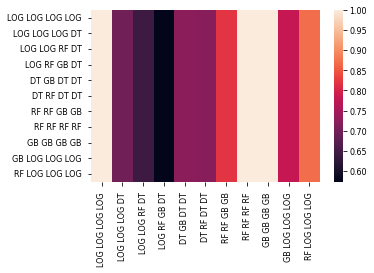

In [35]:
visualize.visualize_heatmap_of_combinations(Summary)

250


100%|███████████████████████████████████████| 500/500 [00:00<00:00, 2072.93it/s]
findfont: Font family ['Palatino Linotype'] not found. Falling back to DejaVu Sans.


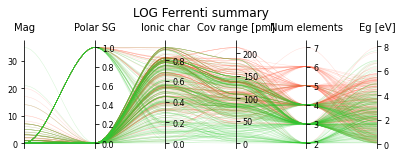

250


100%|███████████████████████████████████████| 500/500 [00:00<00:00, 3116.80it/s]


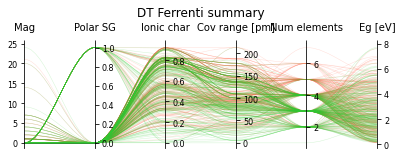

250


100%|███████████████████████████████████████| 500/500 [00:00<00:00, 3135.21it/s]


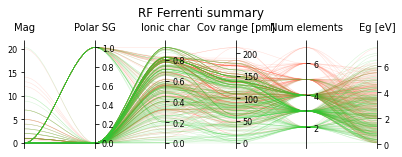

250


100%|███████████████████████████████████████| 500/500 [00:00<00:00, 2282.59it/s]


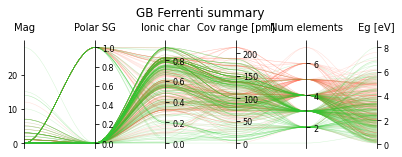

In [37]:
Summary = Summary[Summary["material_id"].isin(generatedData.material_id)].reset_index(drop=True)
generatedData = generatedData[generatedData["material_id"].isin(Summary.material_id)].reset_index(drop=True)
abbreviations = ["LOG ", "DT ", "RF ", "GB "]
for i in range(len(abbreviations)):
    generatedData["candidate"] = Summary[abbreviations[i]]
    visualize.make_parallel_coordinate_matplot(generatedData[Summary[abbreviations[i]]!=-1], InsertApproach+str(abbreviations[i]), title=str(abbreviations[i]) + "" + title, applyLegend=False)